# World and US Sugar Consumption

In [236]:
%matplotlib inline
import numpy as np
import pandas as pd
import xport
from ggplot import *

# Abstract:
Health experts are realizing the negative health effects of the consumption of too much sugar, especially in the form of added sugars. Using the Food and Agriculture Organization of the UN Statistics (FAOSTAT) data on adjusted food balance for availability of sugar in caloric form, as well as the US National Health and Nutrition Examination Servey (HNANES) I would like to investigate the world sugar average consumption in comparison to the US over the years and see if there are trends. I would also like to investigate the US consumption given the large sample size in the HNANES data. 

# Dataset 1: FAOSTAT
FAOSTAT data contains comprehensive agricultural data from a majority of the world's prominently considered or "critical nations." It contains filters to select particular types of data from selected countries, years, and commodities and allows download in .csv format. The data I've chosen to work with includes the following:
* All time (since 1961 - 2011, some countries do not have data for every year) data
* All listed countries
* Sugar consumption (kcal/capita/dy)
* Sugar consumption (kg/capita/yr)
* Total Food Intake (kcal/capita/dy)

In [254]:
world_sugrs_and_cals = pd.read_csv('food_database/world_cals_and_sugars.csv')
world_sugrs_and_cals=world_sugrs_and_cals.iloc[0:25078]
world_sugrs_and_cals.head()

,Domain Code,Domain,AreaCode,AreaName,ElementCode,ElementName,ItemCode,ItemName,Year,Value,Flag,FlagD
0,FBS,Food Balance Sheets,1.0,Armenia,645.0,Food supply quantity (kg/capita/yr),2909.0,Sugar & Sweeteners,1992.0,22.33,Fc,Calculated data
1,FBS,Food Balance Sheets,1.0,Armenia,645.0,Food supply quantity (kg/capita/yr),2909.0,Sugar & Sweeteners,1993.0,22.85,Fc,Calculated data
2,FBS,Food Balance Sheets,1.0,Armenia,645.0,Food supply quantity (kg/capita/yr),2909.0,Sugar & Sweeteners,1994.0,21.88,Fc,Calculated data
3,FBS,Food Balance Sheets,1.0,Armenia,645.0,Food supply quantity (kg/capita/yr),2909.0,Sugar & Sweeteners,1995.0,22.34,Fc,Calculated data
4,FBS,Food Balance Sheets,1.0,Armenia,645.0,Food supply quantity (kg/capita/yr),2909.0,Sugar & Sweeteners,1996.0,22.38,Fc,Calculated data


# Question 1: How do US and worldly sugar consumption compare, and where does the US rank in terms of sugar consumption?
In this section I create a pivot table that takes the sugar consumption of individual countries as values, the years as indices, and the countries as columns in order to 
* Compare US vs. world sugar consumption.
* Compare US to other countries in terms of rank of sugar consumption over the years.
* Plot the data over the years in line, bar chart, and distribution styles.

In [232]:
world_sugrs_and_cals = world_sugrs_and_cals[['AreaName', 'Year' ,'ElementName', 'ItemName', 'Value']]              
world_sugrs_and_cals.head()

,AreaName,Year,ElementName,ItemName,Value
0,Armenia,1992.0,Food supply quantity (kg/capita/yr),Sugar & Sweeteners,22.33
1,Armenia,1993.0,Food supply quantity (kg/capita/yr),Sugar & Sweeteners,22.85
2,Armenia,1994.0,Food supply quantity (kg/capita/yr),Sugar & Sweeteners,21.88
3,Armenia,1995.0,Food supply quantity (kg/capita/yr),Sugar & Sweeteners,22.34
4,Armenia,1996.0,Food supply quantity (kg/capita/yr),Sugar & Sweeteners,22.38


In [148]:
world_sugar_cals =world_sugrs_and_cals[(world_sugrs_and_cals.ElementName == 'Food supply (kcal/capita/day)') & (world_sugrs_and_cals.ItemName == 'Sugar & Sweeteners')]
world_sugar_cals = world_sugar_cals.rename(columns = {'Value':'Sugar (kcal/capita/dy)', 'AreaName':'Area'})
world_sugar_cals = world_sugar_cals[['Area','Year','Sugar (kcal/capita/dy)']]
world_sugar_cals.head()

,Area,Year,Sugar (kcal/capita/dy)
40,Armenia,1992.0,218.0
41,Armenia,1993.0,223.0
42,Armenia,1994.0,214.0
43,Armenia,1995.0,213.0
44,Armenia,1996.0,221.0


In [181]:
world_sugar_cals_pivot = pd.pivot_table(world_sugar_cals, values='Sugar (kcal/capita/dy)', index = 'Year', columns='Area').fillna(0).iloc[0:51]
world_sugar_cals_pivot.head()

Area,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Yugoslav SFR,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1961.0,51.0,110.0,160.0,85.0,354.0,382.0,0.0,558.0,393.0,0.0,...,515.0,375.0,0.0,126.0,350.0,41.0,104.0,192.0,61.0,98.0
1962.0,45.0,113.0,167.0,104.0,460.0,360.0,0.0,541.0,412.0,0.0,...,520.0,391.0,0.0,154.0,336.0,42.0,113.0,184.0,59.0,116.0
1963.0,47.0,122.0,161.0,115.0,388.0,271.0,0.0,545.0,385.0,0.0,...,509.0,355.0,0.0,119.0,317.0,45.0,101.0,203.0,59.0,126.0
1964.0,55.0,130.0,166.0,100.0,385.0,400.0,0.0,554.0,388.0,0.0,...,525.0,381.0,0.0,116.0,369.0,45.0,102.0,221.0,60.0,121.0
1965.0,57.0,132.0,156.0,100.0,448.0,365.0,0.0,556.0,400.0,0.0,...,533.0,380.0,0.0,141.0,379.0,63.0,142.0,265.0,63.0,144.0


Below I have plotted the world average sugar consumption in kcal/capita/dy over the years in comparison to the US average. The worldly average has stayed roughly flat over the years, increasing slightly from just under 200 kcal/capita/dy in 1961 to around 225 in 2011. Unfortunately, the United States is well above the worldly average, and it is plain to see that the sugar consumption has been rising over the years, from around 515 kcal/capita/dy in 1961 to around 575 in 2011. According to this data, US consumption spiked in the early 2000s and then dropped significantly. However, this data only goes until 2011, and it appears as though it is rising again.

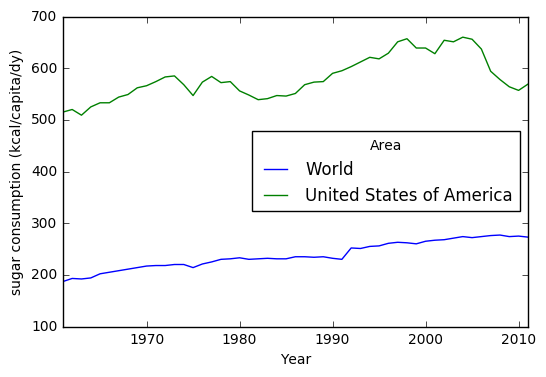

In [166]:
world_sugar_cals_pivot['World'] = world_sugar_cals_pivot.mean(axis = 1).round(0)
ax = world_sugar_cals_pivot.plot(y=['World', 'United States of America'], kind='line', xlim=(1961,2011))
ax.set_ylabel('sugar consumption (kcal/capita/dy)')

This findmax function searches world_sugar_cals_pivot and grabs the country with the highest daily caloric intake of sugar for each year. I then return the data to a dataframe.

In [255]:
def findmax(row):
    max_val = np.max(row)
    name = row[row == max_val].index[0]
    return name
sugar_max = world_sugar_cals_pivot.apply(findmax, axis = 1)
sugar_max = sugar_max.reset_index(name='Country')
sugar_max.head()

,Year,Country
0,1961.0,Colombia
1,1962.0,Colombia
2,1963.0,Iceland
3,1964.0,Iceland
4,1965.0,Iceland


I then sort this data by the number of years each top ranked country is at the top and plot the top consumers. Columbia, unsuprisingly, is number 1, as they are a top sugar producer. Unfortunately, we see the US at a close number 2 on the list, with around 12-13 years ranked as number 1 consumer.

(0, 20)

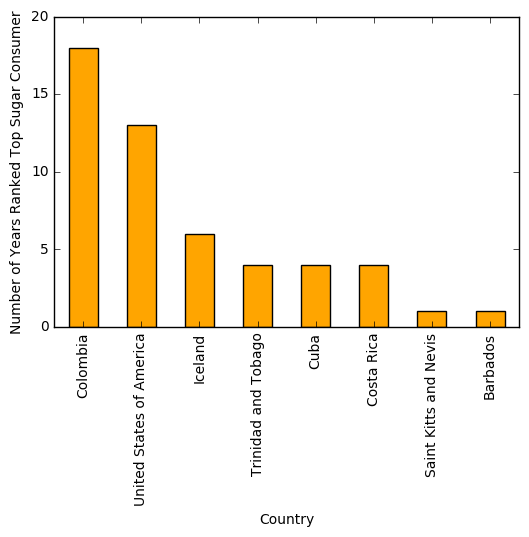

In [256]:
ax = sugar_max.groupby('Country').size().sort_values(ascending=False).plot(kind='bar', color='orange')
ax.set_ylabel('Number of Years Ranked Top Sugar Consumer')
ax.set_ylim(0,20)

Here I use ggplot's density function to get a different take on the data: I plot a distribution of the worldly sugar consumption by kcal/capita/dy. It is interesting in that the data are bimodal: a sold number of countries have consumption just under 100 kcal/capita/dy, and there's another peak around 300. The US would be considered an extreme outlier.

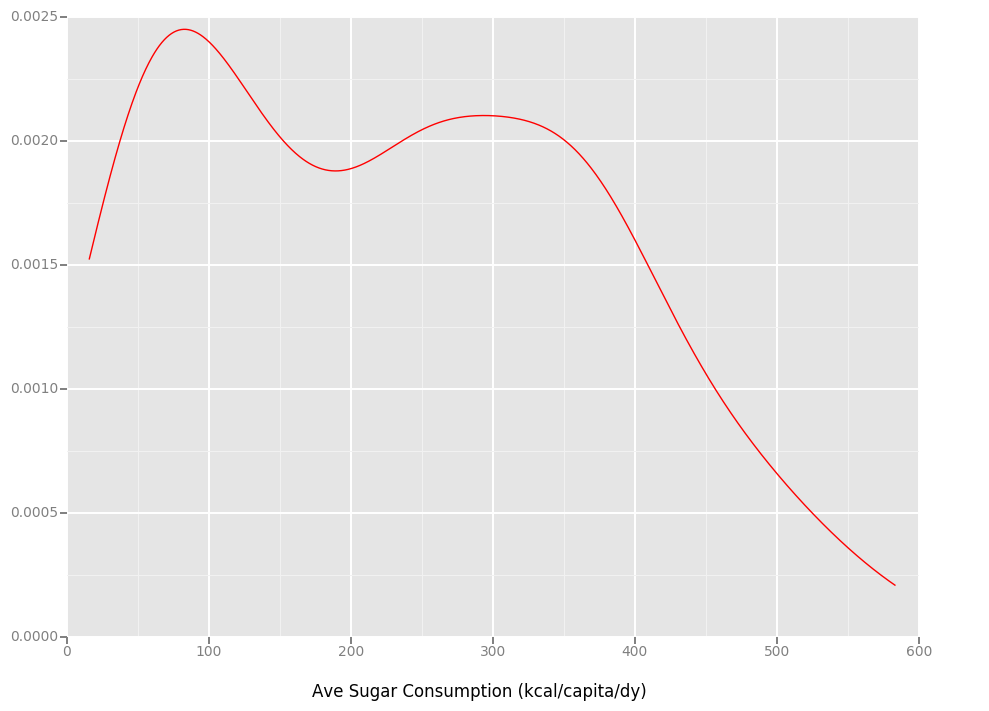

<ggplot: (-9223363273379177370)>

In [239]:
ave_sugars_pivot = pd.pivot_table(world_sugar_cals, values='Sugar (kcal/capita/dy)', index = 'Area', columns='Year').fillna(0)
ave_sugars = ave_sugars_pivot.mean(axis=1).round().reset_index(name='Ave Sugar Consumption (kcal/capita/dy)')
ggplot(aes(x='Ave Sugar Consumption (kcal/capita/dy)'), data=ave_sugars) + geom_density(color='red')


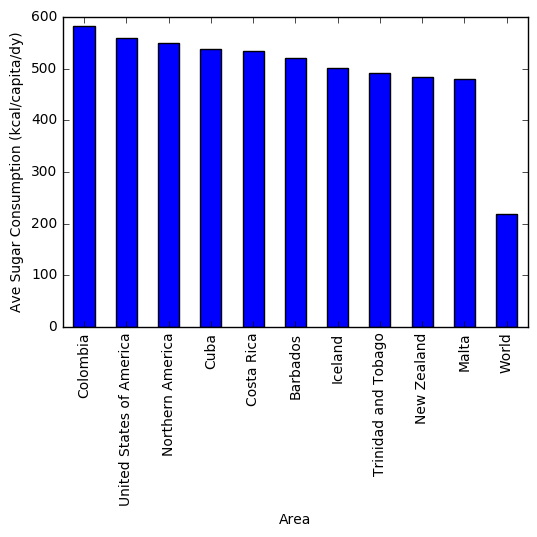

In [141]:
ave_sugars_top_10 = ave_sugars.sort_values('Ave Sugar Consumption (kcal/capita/dy)', ascending=False).iloc[0:10]
ave_sugars_top_10 = ave_sugars_top_10.append(ave_sugars[ave_sugars.Area == 'World'])
ax = ave_sugars_top_10.plot(x='Area', y='Ave Sugar Consumption (kcal/capita/dy)', kind='bar', legend=False)
ax.set_ylabel('Ave Sugar Consumption (kcal/capita/dy)')

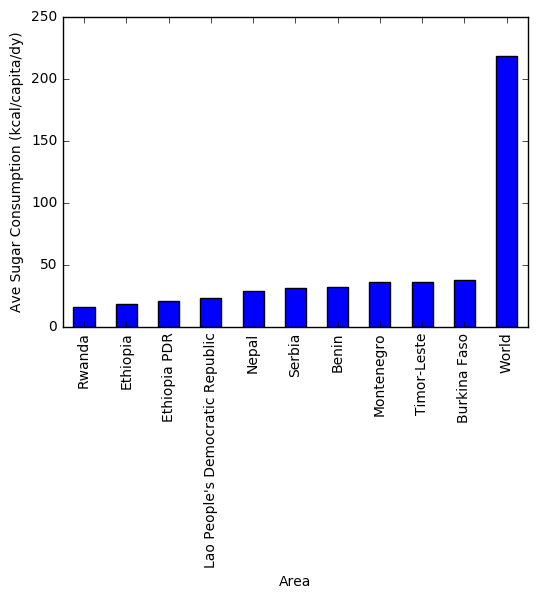

In [142]:
ave_sugars_bottom_10 = ave_sugars.sort_values('Ave Sugar Consumption (kcal/capita/dy)').iloc[0:10].append(ave_sugars[ave_sugars.Area == 'World'])
ax = ave_sugars_bottom_10.plot(x='Area', y='Ave Sugar Consumption (kcal/capita/dy)', kind='bar', legend=False)
ax.set_ylabel('Ave Sugar Consumption (kcal/capita/dy)')

In [203]:
world_cals =world_sugrs_and_cals[(world_sugrs_and_cals.ElementName == 'Food supply (kcal/capita/day)') & (world_sugrs_and_cals.ItemName == 'Grand Total')]
world_cals = world_cals.rename(columns = {'AreaName':'Area', 'Value':'Total_Intake (kcal/capita/dy)'})
world_cals = world_cals[['Area','Year','Total_Intake (kcal/capita/dy)']]
world_cals.head()

,Area,Year,Total_Intake (kcal/capita/dy)
20,Armenia,1992.0,2184.0
21,Armenia,1993.0,2103.0
22,Armenia,1994.0,2251.0
23,Armenia,1995.0,2276.0
24,Armenia,1996.0,2420.0


In [205]:
world_cals_pivot = pd.pivot_table(world_cals, values='Total_Intake (kcal/capita/dy)', index = 'Year', columns='Area').fillna(0).iloc[0:51]
world_cals_pivot.head()

Area,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Yugoslav SFR,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1961.0,2999.0,2223.0,1619.0,1798.0,2008.0,3106.0,0.0,3087.0,3191.0,0.0,...,2880.0,2795.0,0.0,2446.0,2155.0,1907.0,1792.0,3049.0,2155.0,2115.0
1962.0,2917.0,2240.0,1569.0,1819.0,2185.0,3078.0,0.0,3110.0,3193.0,0.0,...,2858.0,2709.0,0.0,2517.0,2109.0,1962.0,1800.0,3193.0,2152.0,2161.0
1963.0,2698.0,2156.0,1528.0,1853.0,2052.0,3031.0,0.0,3162.0,3248.0,0.0,...,2860.0,2773.0,0.0,2537.0,2105.0,1957.0,1819.0,3210.0,2105.0,2148.0
1964.0,2953.0,2270.0,1540.0,1862.0,2126.0,3077.0,0.0,3141.0,3270.0,0.0,...,2926.0,2948.0,0.0,2487.0,2302.0,1942.0,1825.0,3286.0,2057.0,2139.0
1965.0,2956.0,2254.0,1591.0,1877.0,2222.0,3183.0,0.0,3090.0,3220.0,0.0,...,2922.0,2781.0,0.0,2547.0,2267.0,1943.0,1844.0,3294.0,2040.0,2146.0


In [217]:
ave_cals_pivot = pd.pivot_table(world_cals, values='Total_Intake (kcal/capita/dy)', index = 'Area', columns='Year').fillna(0)
ave_cals = ave_cals_pivot.mean(axis=1).round().reset_index(name='Ave Intake (kcal/capita/dy)')
ave_cals.head()

,Area,Ave Intake (kcal/capita/dy)
0,Afghanistan,2348.0
1,Albania,2524.0
2,Algeria,2479.0
3,Angola,1891.0
4,Antigua and Barbuda,2062.0


In [235]:
frac_sugs = pd.merge(ave_sugars, ave_cals, left_on='Area', right_on='Area')
frac_sugs['Sugar Fraction of Intake'] = (frac_sugs['Ave Sugar Consumption (kcal/capita/dy)'] / frac_sugs['Ave Intake (kcal/capita/dy)']).round(3)

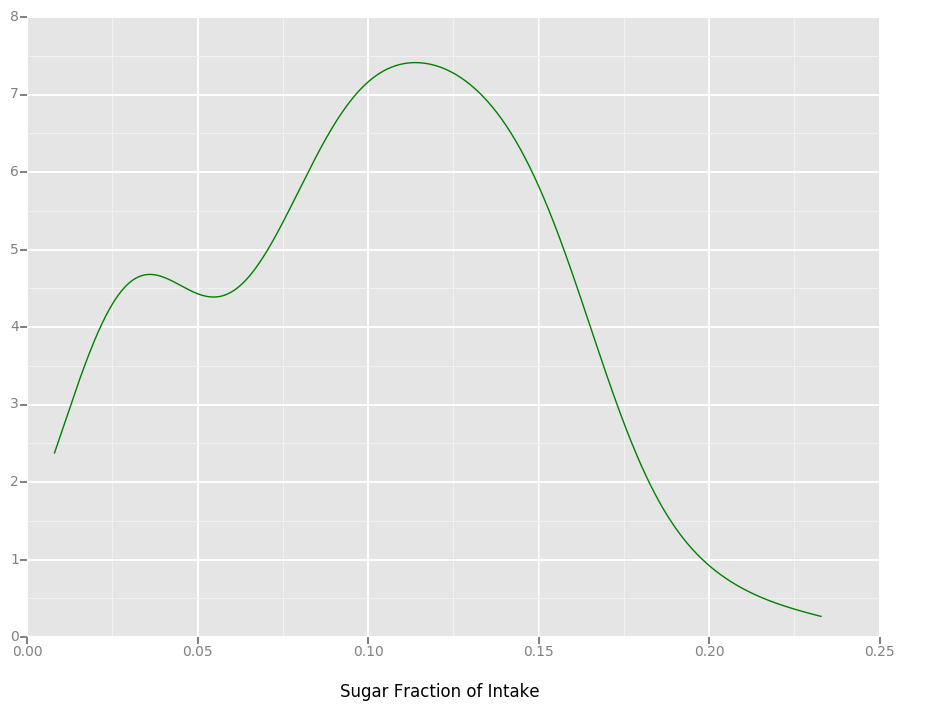

<ggplot: (8763475755542)>

In [240]:
ggplot(aes(x='Sugar Fraction of Intake'), data=frac_sugs) + geom_density(color='green')

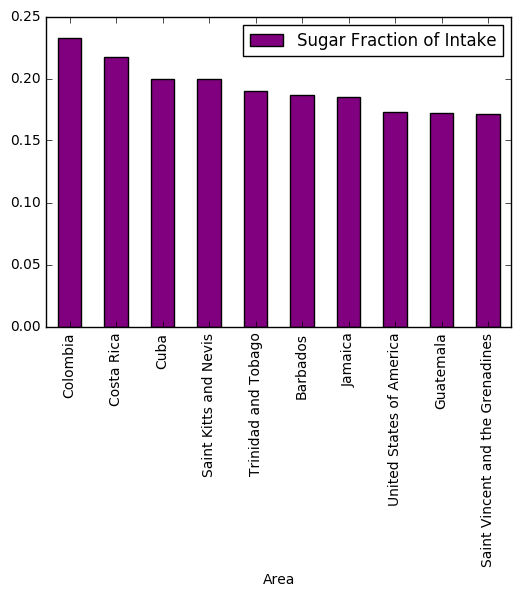

In [231]:
max_frac_sugs_top_10 = frac_sugs.sort_values('Sugar Fraction of Intake', ascending=False)[0:10]
ax = max_frac_sugs_top_10.plot(x='Area', y='Sugar Fraction of Intake', kind='bar', color='purple')

In [241]:
def get_data(fname):
    """ 
    Place all the data in the file `fname` into a dictionary indexed 
    by sequence number.

    Arguments:
    ----------
    fname : The file name of the data

    Returns:
    --------
    A : A Pandas DataFrame containing all the data in the file
    """

    ## The data, consisting of a list of dictionaries mapping
    ## variable names to values.  Each element of the list
    ## contains the data for one subject
    with open(fname, 'rb') as f:
        Z = [row for row in xport.Reader(f)]

    ## Create the data frame
    A = pd.DataFrame(Z)

    return A

In [243]:
# Read all the data files
FN = ["food_database/total_nutrients_dy1.XPT", "food_database/total_nutrients_dy2.XPT"]
D = []
for fn in FN:
    X = get_data(fn)
    s = fn.replace(".XPT", "")
    H = {x: s + ":" + x for x in X.columns}
    X.rename(columns=H, inplace=True)
    D.append(X)

In [244]:
# Merge all the data files
total_nutrients = pd.concat(D, axis=1).fillna(0)
total_nutrients.head()

,food_database/total_nutrients_dy1:SEQN,food_database/total_nutrients_dy1:WTDRD1,food_database/total_nutrients_dy1:WTDR2D,food_database/total_nutrients_dy1:DR1DRSTZ,food_database/total_nutrients_dy1:DR1EXMER,food_database/total_nutrients_dy1:DRABF,food_database/total_nutrients_dy1:DRDINT,food_database/total_nutrients_dy1:DR1DBIH,food_database/total_nutrients_dy1:DR1DAY,food_database/total_nutrients_dy1:DR1LANG,...,food_database/total_nutrients_dy2:DR2TP184,food_database/total_nutrients_dy2:DR2TP204,food_database/total_nutrients_dy2:DR2TP205,food_database/total_nutrients_dy2:DR2TP225,food_database/total_nutrients_dy2:DR2TP226,food_database/total_nutrients_dy2:DR2_300,food_database/total_nutrients_dy2:DR2_320Z,food_database/total_nutrients_dy2:DR2_330Z,food_database/total_nutrients_dy2:DR2BWATZ,food_database/total_nutrients_dy2:DR2TWS
0,62161.0,58373.375716,46955.912018,1.0,63.0,2.0,2.0,9.0,6.0,1.0,...,0.002,0.207,0.011,0.016,0.013,1.0,0.00,0.00,0.00,1.0
1,62162.0,15886.609265,13901.170266,1.0,42.0,2.0,2.0,29.0,1.0,1.0,...,0.001,0.046,0.005,0.005,0.003,2.0,118.50,0.00,118.50,1.0
2,62163.0,3876.441104,2755.061606,1.0,25.0,2.0,2.0,3.0,6.0,1.0,...,0.001,0.073,0.003,0.025,0.001,2.0,429.56,429.56,0.00,99.0
3,62164.0,70653.580056,52879.479478,1.0,42.0,2.0,2.0,19.0,7.0,1.0,...,0.000,0.136,0.008,0.013,0.010,2.0,0.00,0.00,0.00,1.0
4,62165.0,5910.002709,9478.001856,1.0,25.0,2.0,2.0,12.0,6.0,1.0,...,0.003,0.134,0.006,0.013,0.010,2.0,222.19,0.00,222.19,4.0


In [245]:
total_sugars=total_nutrients[['food_database/total_nutrients_dy1:SEQN', 'food_database/total_nutrients_dy1:DR1TKCAL', 'food_database/total_nutrients_dy2:DR2TKCAL', 'food_database/total_nutrients_dy1:DR1TSUGR','food_database/total_nutrients_dy2:DR2TSUGR']]
total_sugars.columns = ['participant_number','total_kcal1','total_kcal2', 'total_sugar1','total_sugar2']
total_sugars.head()

,participant_number,total_kcal1,total_kcal2,total_sugar1,total_sugar2
0,62161.0,2969.0,3567.0,109.09,232.37
1,62162.0,1494.0,1538.0,112.71,99.52
2,62163.0,1789.0,1777.0,114.94,62.74
3,62164.0,1115.0,2372.0,32.29,48.97
4,62165.0,1472.0,1341.0,72.34,67.38


In [246]:
total_sugars['participant_number'] = total_sugars['participant_number']-62160
total_sugars['total_kcals'] = total_sugars[['total_kcal1','total_kcal2']].mean(axis=1).round()
total_sugars['total_sugars_gms'] = total_sugars[['total_sugar1','total_sugar2']].mean(axis=1).round()
total_sugars['sugar_kcals'] = total_sugars['total_sugars_gms']*4.0
total_sugars['sugar_ratio_total_kcals'] = (total_sugars['total_sugars_gms']*4.0)/ (total_sugars['total_kcals'])
sugar_intake = total_sugars[['participant_number', 'total_sugars_gms', 'sugar_kcals', 'sugar_ratio_total_kcals' ]]

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

In [247]:
sugar_intake['sugar_ratio_total_kcals']=round(sugar_intake['sugar_ratio_total_kcals'],2)
sugar_intake.head()

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,participant_number,total_sugars_gms,sugar_kcals,sugar_ratio_total_kcals
0,1.0,171.0,684.0,0.21
1,2.0,106.0,424.0,0.28
2,3.0,89.0,356.0,0.20
3,4.0,41.0,164.0,0.09
4,5.0,70.0,280.0,0.20


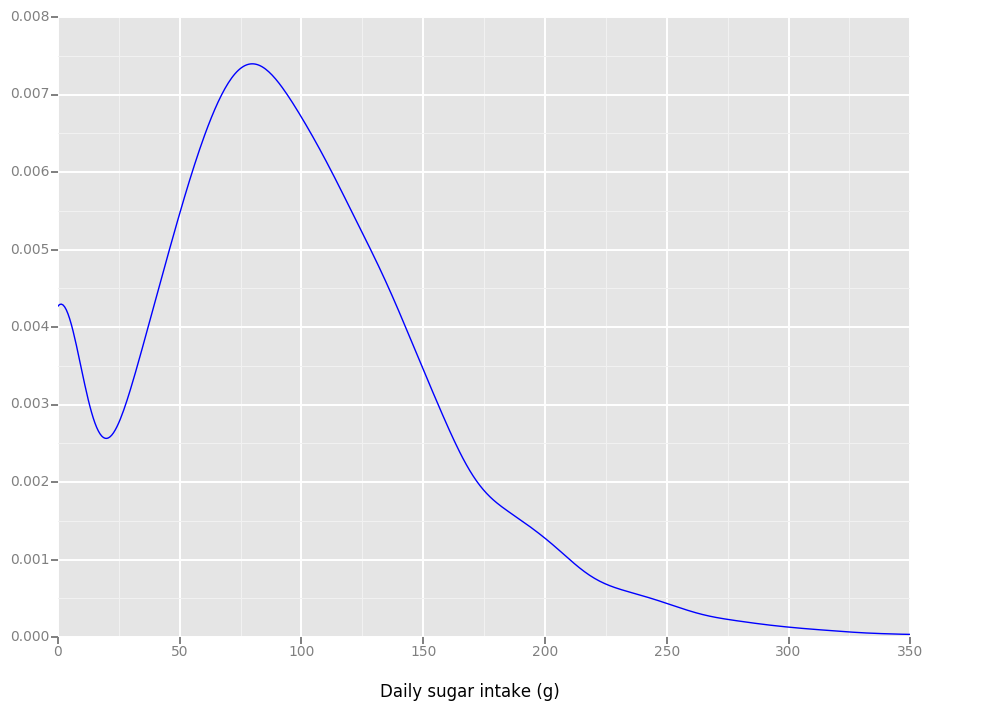

<ggplot: (-9223363273379369398)>

In [252]:
ggplot(aes(x='total_sugars_gms'), data=sugar_intake) + geom_density(color='blue') + xlim(0,350) + xlab('Daily sugar intake (g)')

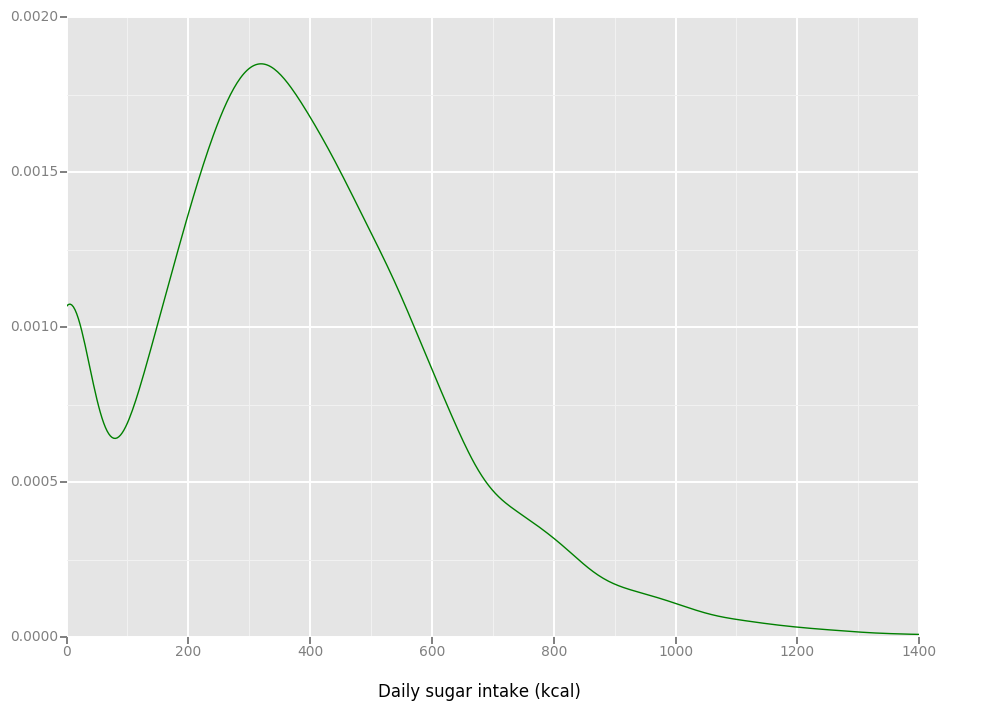

<ggplot: (-9223363273379535072)>

In [261]:
ggplot(aes(x='sugar_kcals'), data=sugar_intake) + geom_density(color='green') + xlim(0,1400) + xlab('Daily sugar intake (kcal)')

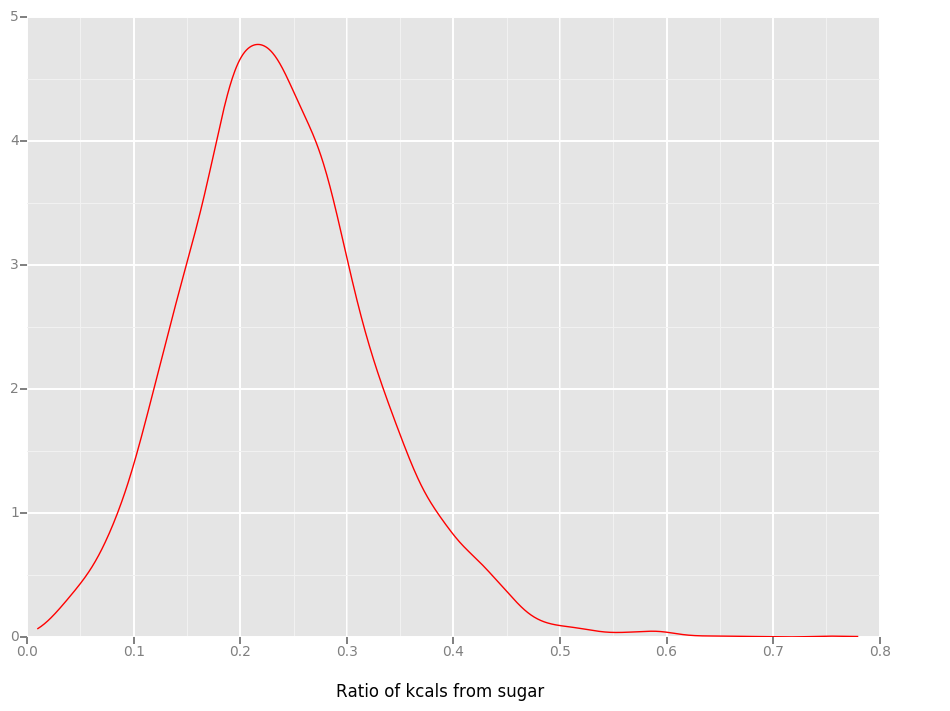

<ggplot: (8763475498230)>

In [249]:
ggplot(aes(x='sugar_ratio_total_kcals'), data=sugar_intake) + geom_density(color='red') + xlab('Ratio of kcals from sugar')

# 